<a href="https://colab.research.google.com/github/madhulathachavali/AIML/blob/main/Depression_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Black and white thinking is characterized by thinking in absolutes. For instance, one thinks he/she is either too good or too bad at something. This is an important variable in the assessment of many psychological disorders.

The project aims to determine if there is a relationship between higher levels of black and white thinking, and higher levels of self-reported cases of depression. To understand the data further, K means clustering is used to form clusters and individual clusters are analyzed for simplicity, fatalism, and depression.


This study measures black and white thinking using six variables :

1. Simplicity or black and white thinking

2. Fatalism

3. Depression

4. Adjusted simplicity

5. Adjusted fatalism

6. Adjusted depression

The last three variables are adjusted by regression for other variables which might affect depression. In this analysis, only first three variables are used.



Data Sources:
The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression. Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008).  

**1. Import the packages and load the data**

In [16]:
# Load the necessary packages
import numpy as np                                    
import pandas as pd 
import seaborn as sns # statistical plots
import matplotlib.pyplot as plt #importing plotting libraries
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore


In [17]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Change directory when needed
data_path ="/content/drive/My Drive/Data/Depression.csv"

In [19]:
data=pd.DataFrame(pd.read_csv(data_path))

**2. EDA**

In [20]:
data.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [21]:
data.shape

(82, 7)

In [22]:
data.nunique()

id            82
simplicity    48
fatalism      11
depression    37
adjsimp       80
adjfatal      69
adjdep        80
dtype: int64

In [23]:
data.isnull().sum() # no missing values

id            0
simplicity    0
fatalism      0
depression    0
adjsimp       0
adjfatal      0
adjdep        0
dtype: int64

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,82.0,41.500000,23.815261,1.00000,21.250000,41.500000,61.75000,82.00000
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          82 non-null     int64  
 1   simplicity  82 non-null     float64
 2   fatalism    82 non-null     float64
 3   depression  82 non-null     float64
 4   adjsimp     82 non-null     float64
 5   adjfatal    82 non-null     float64
 6   adjdep      82 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.6 KB


Descriptive analysis

1. There are 82 observations in total with no missing values
2. All variables are ‘float’
3. Simplicity has a mean of 1 with a standard deviation 0.5. Values range from 0.25 to 2.85.
4. Fatalism has a mean of 1 with a standard deviation 0.49. Values range from 0.05 to 2.22.
5. Depression has a mean of 1 with a standard deviation 0.5. Values range from 0.46 to 2.24.

In [26]:
##Remove id since it is redundant
data.drop('id', axis=1, inplace=True)

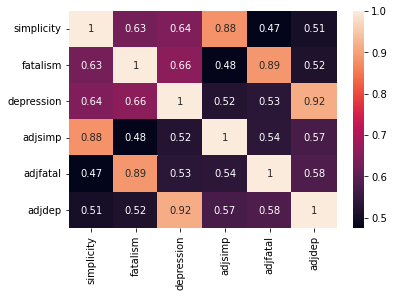

In [27]:
corr = data.corr()
sns.heatmap(corr, annot = True)

Correlation Matrix

The Pearson correlation coefficient is a measure of linear association between two variables. Values of the correlation coefficient are always between -1 and +1. Perfect correlation is indicated by +1 and the opposite is indicated by -1. Zero means no correlation.

The correlation heatmap shows that all the variables are highly correlated. The correlation coefficient between simplicity and depression (0.64) is strong and positive. A positive value of the correlation coefficient implies that the higher levels of simplicity or black and white thinking is associated with higher levels of depression. Similar values were observed for simplicity and fatalism (0.63), and depression and fatalism (0.66)

The linear and positive relationship between simplicity and depression, and simplicity and fatalism are shown in the below graphs. It is important to note that correlation does not indicate casualty and is only indicative of a relationship between the two variables.

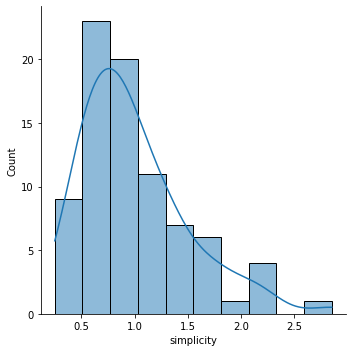

In [28]:
sns.displot(data, x="simplicity", kde='True')
# sns.displot(data_scaled, x="depression", kde='True')

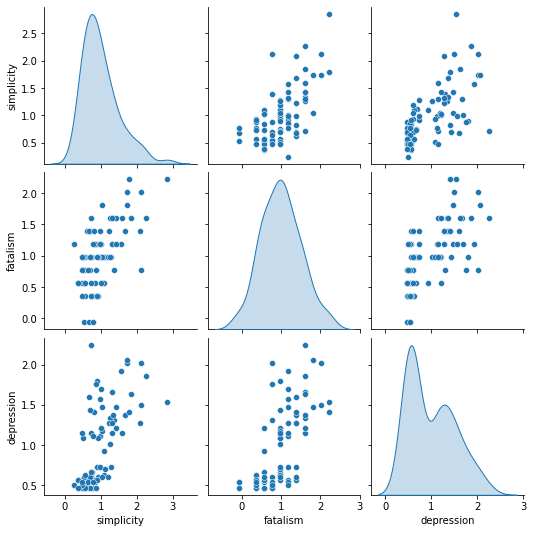

In [29]:
data.drop(columns = {'adjsimp', 'adjfatal','adjdep'}, inplace=True)
sns.pairplot(data, diag_kind='kde')

Univariate analysis

1. Simplicity has a positively skewed distribution
2. Fatalism has a uniform distribution
3. Depression has two distributions indicated by 2 peaks in the below graph



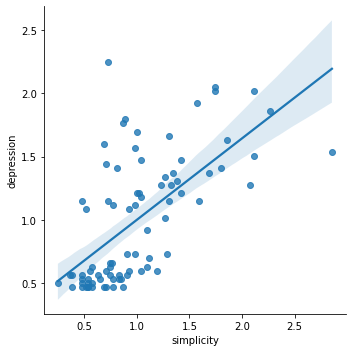

In [30]:
sns.lmplot(x="simplicity", y="depression", data=data, palette="Set1")

In [31]:
data['simplicity'].corr(data['depression'])

0.6432667885861316

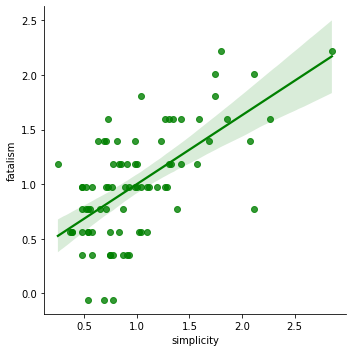

In [32]:
# lmplot for simplicity and fatalism
sns.lmplot(x="simplicity", y="fatalism", data=data,line_kws={'color': 'green'}, scatter_kws={'color': 'green'})

In [33]:
data['simplicity'].corr(data['fatalism'])

0.6312820091181763

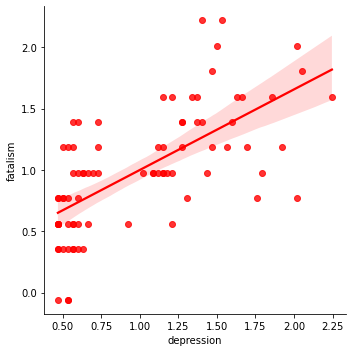

In [34]:
# lmplot for depression and fatalism
sns.lmplot(x="depression", y="fatalism", data=data,line_kws={'color': 'red'}, scatter_kws={'color': 'red'})

In [35]:
data['depression'].corr(data['fatalism'])

0.6573673695588931

The linear and positive relationship between simplicity and depression, and simplicity and fatalism are shown in the above graphs. It is important to note that correlation does not indicate casualty and is only indicative of a relationship between the two variables.



**Normalization**


As there are many outliers as seen in the linear plots above, grouping the data helps to identify hidden patterns. Before grouping, the dataset is normalized. It is essential for this dataset as the variables do not have uniform distribution (as seen in the pairplot above). In this analysis, Z score normalization is used. Z score normalizes the mean of all observations to 0 and the standard deviation to 1 . Z score is number of standard deviations away from mean. This scaling is better when units and magnitude of the each variables are different.

In [36]:
data_scaled=data.apply(zscore)
data_scaled.head()

,simplicity,fatalism,depression
0,-0.141205,-1.296147,-0.807541
1,-0.179157,0.371048,-0.547611
2,-0.938421,-2.129764,-0.937516
3,-0.520827,-1.296147,-0.872518
4,-0.938421,-0.462549,-1.002493


***3. Group Data into similar clusters***

K-means clustering

k-means is an unsupervised learning algorithm that divides the data into clusters based on similarities, minimizing the variance. But first, we have to select the optimal k value using the commonly used elbow method. In the below graph, the k-means model is fitted with a range of k values from 1 to 10. The line represents the arm and the inflection of the arm is an indication of an optimal number of clusters to be selected.



Text(0.5, 1.0, 'Selection of k using Elbow Method')

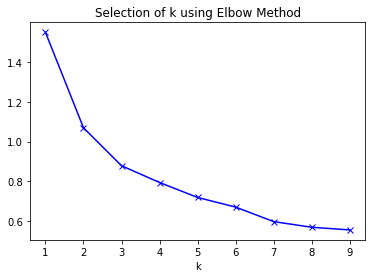

In [37]:
# Finding optimal no. of elements
from scipy.spatial.distance import cdist
clusters=range(1,10) # Cluster range 
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction=model.predict(data_scaled)
    meanDistortions.append(sum(np.min(cdist(data_scaled, model.cluster_centers_, 'minkowski'), axis=1)) / data_scaled.shape[0])
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.title('Selection of k using Elbow Method')

Analysis of clusters (k=3)

A bend is observed at 3 using Minkowski distance (Combination of Euclidean and Manhattan Distance). In the elbow method. Other distances can be explored to get discrete groups. Next, the K-means model with k=3 is fitted and predicted on scaled data, thus forming 3 clusters. The prediction column is added to both original and scaled data to further analyze the distribution of each cluster.


**K = 3**

In [38]:
# Let us first start with K = 3
modelk3=KMeans(3)
modelk3.fit(data_scaled)
prediction=modelk3.predict(data_scaled)

#Append the prediction 
data["GROUPk3"] = prediction
data_scaled["GROUPk3"] = prediction
print("Three Groups Assigned : \n")
data.head()

Three Groups Assigned : 



,simplicity,fatalism,depression,GROUPk3
0,0.92983,0.35589,0.59870,0
1,0.91097,1.18439,0.72787,2
2,0.53366,-0.05837,0.53411,0
3,0.74118,0.35589,0.56641,0
4,0.53366,0.77014,0.50182,0


In [39]:
data['GROUPk3'].value_counts() 

2    33
0    30
1    19
Name: GROUPk3, dtype: int64

There are 29 observations in group 0, 27 in group 1, and 26 in group 2.

Simplicity: Group 0 (mean 0.85), Group 1 (mean=1.46) and Group 2 (mean = 0.64)

Fatalism: Group 0 (mean 1.03), Group 1 (mean=1.45) and Group 2 (mean = 0.47)

Depression: Group 0 (mean 0.86), Group 1 (mean=1.56) and Group 2 (mean = 0.52)


In [40]:
#data.boxplot(by = 'GROUPk3',  layout=(2,4), figsize=(20, 15))

In [41]:
dataClust3 = data.groupby(['GROUPk3'])
dataClust3.mean()

,simplicity,fatalism,depression
GROUPk3,,,
0,0.620441,0.535396,0.530885
1,1.681462,1.620451,1.606584
2,0.952698,1.065139,1.077224


Text(0.5, 0, 'Group')

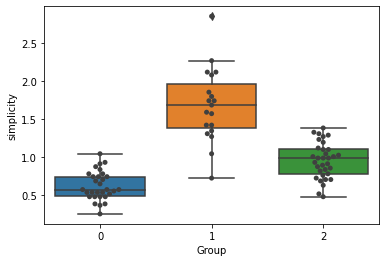

In [42]:
sns.boxplot(x="GROUPk3", y="simplicity", data=data)
sns.swarmplot(x="GROUPk3", y="simplicity", data=data, color=".25")
plt.xlabel('Group')

Text(0.5, 0, 'Group')

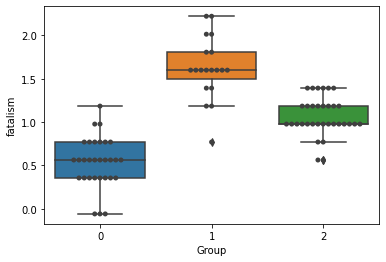

In [43]:
sns.boxplot(x="GROUPk3", y="fatalism", data=data)
sns.swarmplot(x="GROUPk3", y="fatalism", data=data, color=".25")
plt.xlabel('Group')

Text(0.5, 0, 'Group')

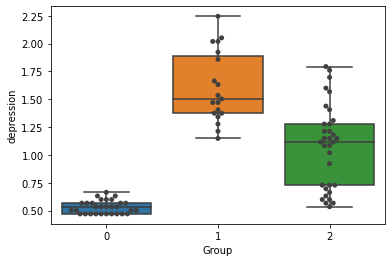

In [44]:
sns.boxplot(x="GROUPk3", y="depression", data=data)
sns.swarmplot(x="GROUPk3", y="depression", data=data, color=".25")
plt.xlabel('Group')

Conclusion

Discrete groups were created using k=3 with minimal overlapping among the groups. Group 1 has higher simplicity levels, which correlates with higher depression and fatalism levels. Similarly, Group 0 and Group 2 have moderate and lower simplicity thinking respectively, which correlates with moderate and lower depression levels.

Groups 0 and 1 showed a strong correlation between simplicity, fatalism, and depression. Group 2 showed lower simplicity but higher fatalism. This group is an exception to the correlation between depression and fatalism as well. Further understanding of this group to required to know what is causing fatalism.

In conclusion, there is a linear and strong positive relationship between black and white thinking and depression using the whole dataset. K-means clustering helped in identifying two classes of the population. Majority class (groups 0 and 1) strongly correlated with simplicity, depression, and fatalism. Minority class (group 2), even though they experience fatalism, it does not correlate with simplicity and depression. Without cluster analysis, this class may be mistakenly confined to the majority class.

References

https://www.healthline.com/health/mental-health/black-and-white-thinking

https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

https://www.statology.org/z-score-normalization/#:~:text=Z%2Dscore%20normalization%20refers%20to,the%20standard%20deviation%20is%201.

https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/

Acknowledgments

I worked on this project as part of the AIML post-graduate program offered by the University of Texas, Austin.